In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
data=pd.read_csv('data/customersatisfaction_train.csv',nrows=20000)

In [4]:
data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40055,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
19996,40058,2,25,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86339.040000,0
19997,40059,2,24,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74521.200000,0
19998,40065,2,73,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138092.430000,0


In [5]:
x=data.drop('TARGET',axis=1)
y=data['TARGET']
x.shape, y.shape

((20000, 370), (20000,))

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

# Univariate filtering methods
-Constant Removal
-Quasi Constant Removal
-Duplicate Feature Removal

# Constant Features Removal

In [7]:
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [8]:
constant_filter.get_support().sum()
#370개에서 제거하고 291개 남음

291

In [9]:
constant_list=[not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [10]:
x.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [11]:
x_train_filter=constant_filter.transform(x_train)
x_test_filter=constant_filter.transform(x_test)

In [12]:
x_train_filter.shape , x_test_filter.shape , x_train.shape

((16000, 291), (4000, 291), (16000, 370))

# Quasi constant feature removal

In [13]:
quasi_constant_filter=VarianceThreshold(threshold=0.01)

In [14]:
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [15]:
quasi_constant_filter.get_support().sum()

245

In [16]:
x_train_quasi_filter=quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter=quasi_constant_filter.transform(x_test_filter)

In [17]:
x_train_quasi_filter.shape , x_test_quasi_filter.shape 

((16000, 245), (4000, 245))

# Remove Duplicate Features

바로가는 tool이 없어서 transpose 하고 해야함

In [18]:
x_train_T=x_train_quasi_filter.T
x_test_T=x_test_quasi_filter.T

In [19]:
type(x_train_T)

numpy.ndarray

In [20]:
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

In [21]:
x_train_T.shape, x_test_T.shape

((245, 16000), (245, 4000))

In [22]:
duplicated_features=x_train_T.duplicated()

In [23]:
features_to_keep=[not index for index in duplicated_features]

In [24]:
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 Fals

In [25]:
x_train_unique=x_train_T[features_to_keep].T
x_test_unique=x_test_T[features_to_keep].T

In [26]:
x_train_unique.shape , x_test_unique.shape , x_train.shape

((16000, 227), (4000, 227), (16000, 370))

# build ML model and compare the performance of the selected feature

In [27]:
def run_randomforest(x_train,x_test,y_train,y_test):
    clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('Accuracy on test set:',accuracy_score(y_test,y_pred))

In [28]:
%%time
run_randomforest(x_train_unique,x_test_unique,y_train,y_test)

Accuracy on test set: 0.95875
Wall time: 3.07 s


In [29]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy on test set: 0.9585
Wall time: 3.53 s


# Multi-variate : Pearson Correlation

In [49]:
corrmat=x_train_unique.corr()

In [51]:
corrmat.head(10)

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
5,-0.001697,0.009232,0.109140,0.024905,0.888789,1.000000,0.363680,0.384820,0.017671,0.030060,...,0.000328,0.010860,-0.001706,0.012963,0.013553,0.000871,0.007096,-0.001672,-0.001844,0.002257
6,-0.015882,0.001638,0.048524,0.014513,0.381632,0.363680,1.000000,0.908158,0.030397,0.036359,...,-0.000485,0.006351,-0.000301,0.002590,0.003867,-0.000818,-0.000515,-0.000779,-0.000839,0.004448
7,-0.019807,0.001746,0.055708,0.013857,0.341266,0.384820,0.908158,1.000000,0.047667,0.056456,...,-0.000514,0.006336,-0.000318,0.002476,0.003707,-0.000866,-0.000545,-0.000825,-0.000888,0.002427
8,0.000956,0.000614,0.004040,-0.000613,0.012927,0.017671,0.030397,0.047667,1.000000,0.988256,...,-0.000184,-0.000197,-0.000114,-0.000185,-0.000189,-0.000309,-0.000195,-0.000295,-0.000317,-0.000739
9,-0.000588,0.000695,0.005796,-0.000691,0.019674,0.030060,0.036359,0.056456,0.988256,1.000000,...,-0.000207,-0.000222,-0.000128,-0.000208,-0.000213,-0.000349,-0.000220,-0.000332,-0.000358,-0.000811


<AxesSubplot:>

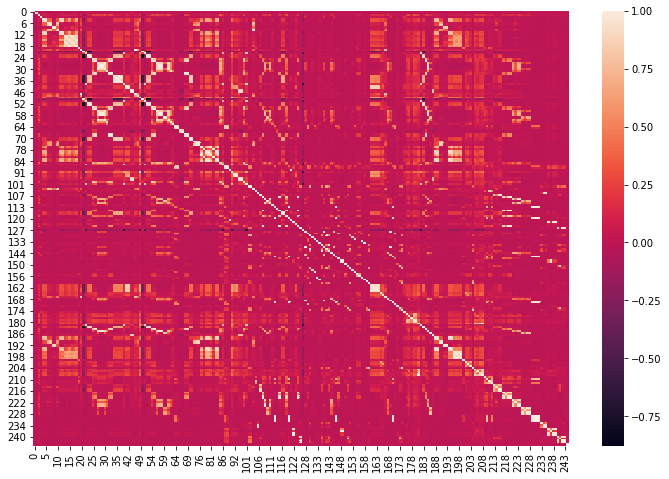

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [33]:
def get_correlation(data,threshold):
    corr_col=set()
    corrmat=data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [34]:
corr_features=get_correlation(x_train_unique,0.85)
corr_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 91,
 93,
 95,
 98,
 100,
 101,
 103,
 104,
 111,
 115,
 117,
 120,
 121,
 125,
 136,
 138,
 143,
 146,
 149,
 153,
 154,
 157,
 158,
 161,
 162,
 163,
 164,
 169,
 170,
 173,
 180,
 182,
 183,
 184,
 185,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 204,
 205,
 207,
 208,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243}

In [47]:
len(corr_features)

124

In [52]:
x_train_uncorr=x_train_unique.drop(labels=corr_features,axis=1)
x_test_uncorr=x_test_unique.drop(labels=corr_features,axis=1)

In [53]:
x_train_uncorr.shape , x_test_uncorr.shape

((16000, 103), (4000, 103))

In [56]:
%%time
run_randomforest(x_train_uncorr,x_test_uncorr,y_train,y_test)

Accuracy on test set: 0.95875
Wall time: 2.26 s


In [57]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy on test set: 0.9585
Wall time: 3.93 s


## feature grouping and feature importance

In [75]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.008825,0.000922,0.041321,0.000541,-0.001905,0.000871,-0.000818,-0.000866,-0.000309,-0.000349,...,0.012705,0.021540,-0.000170,0.032162,0.030087,1.000000,0.329805,0.935317,0.919036,0.011106
241,-0.009174,0.000598,0.016172,-0.000577,-0.000635,0.007096,-0.000515,-0.000545,-0.000195,-0.000220,...,-0.000173,-0.000185,-0.000107,-0.000174,-0.000178,0.329805,1.000000,0.127224,0.140902,0.011807
242,0.012031,0.000875,0.043577,0.000231,-0.002552,-0.001672,-0.000779,-0.000825,-0.000295,-0.000332,...,0.027515,0.012393,-0.000162,0.018565,0.017358,0.935317,0.127224,1.000000,0.993536,0.008604
243,0.012128,0.000942,0.044281,0.000235,-0.002736,-0.001844,-0.000839,-0.000888,-0.000317,-0.000358,...,0.023072,0.014523,-0.000174,0.021742,0.020331,0.919036,0.140902,0.993536,1.000000,0.009136


In [76]:
corrdata=corrmat.abs().stack()
corrdata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
              ...   
244  240    0.011106
     241    0.011807
     242    0.008604
     243    0.009136
     244    1.000000
Length: 51529, dtype: float64

In [77]:
corrdata=corrdata.sort_values(ascending=False)
corrdata

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
                ...     
229  111    1.934954e-06
231  150    6.044672e-07
150  231    6.044672e-07
231  123    3.966696e-07
123  231    3.966696e-07
Length: 51529, dtype: float64

In [78]:
corrdata=corrdata[corrdata>0.85]
corrdata=corrdata[corrdata<1]
corrdata

143  135    1.000000
135  143    1.000000
136  128    1.000000
128  136    1.000000
31   62     1.000000
              ...   
67   66     0.851384
61   28     0.851022
28   61     0.851022
72   35     0.850893
35   72     0.850893
Length: 534, dtype: float64

In [79]:
corrdata=pd.DataFrame(corrdata).reset_index()
corrdata.columns=['features1','features2','corr_value']
corrdata

,features1,features2,corr_value
0,143,135,1.000000
1,135,143,1.000000
2,136,128,1.000000
3,128,136,1.000000
4,31,62,1.000000
...,...,...,...
529,67,66,0.851384
530,61,28,0.851022
531,28,61,0.851022
532,72,35,0.850893


In [82]:
len(corrdata.features1.unique())

170

In [83]:
grouped_feature_list=[]
correlated_groups_list=[]
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block=corrdata[corrdata.features1==feature]
        grouped_feature_list=grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [87]:
grouped_feature_list

[135,
 143,
 128,
 169,
 136,
 62,
 31,
 47,
 20,
 23,
 24,
 53,
 21,
 183,
 52,
 69,
 32,
 68,
 26,
 55,
 184,
 33,
 133,
 157,
 149,
 148,
 237,
 132,
 154,
 230,
 229,
 231,
 232,
 113,
 120,
 170,
 146,
 122,
 239,
 236,
 238,
 78,
 82,
 115,
 219,
 125,
 220,
 217,
 108,
 197,
 196,
 198,
 199,
 208,
 205,
 207,
 181,
 14,
 16,
 13,
 17,
 243,
 126,
 240,
 242,
 57,
 58,
 29,
 185,
 27,
 30,
 61,
 28,
 22,
 182,
 51,
 46,
 98,
 95,
 44,
 81,
 80,
 84,
 77,
 223,
 224,
 221,
 111,
 109,
 8,
 193,
 192,
 9,
 228,
 225,
 227,
 117,
 116,
 49,
 91,
 25,
 100,
 54,
 75,
 74,
 191,
 190,
 76,
 35,
 34,
 36,
 72,
 38,
 15,
 16,
 13,
 18,
 107,
 216,
 215,
 61,
 27,
 30,
 56,
 163,
 161,
 164,
 41,
 162,
 103,
 102,
 79,
 188,
 84,
 194,
 80,
 189,
 83,
 72,
 35,
 70,
 60,
 59,
 189,
 80,
 194,
 84,
 188,
 79,
 195,
 234,
 106,
 235,
 104,
 10,
 179,
 180,
 151,
 241,
 41,
 161,
 164,
 42,
 5,
 11,
 12,
 11,
 5,
 4,
 92,
 93,
 121,
 89,
 87,
 88,
 204,
 174,
 21,
 50,
 7,
 6,
 65,
 87,
 6

In [85]:
correlated_groups_list

[   features1  features2  corr_value
 0        143        135         1.0,
      features1  features2  corr_value
 2          136        128    1.000000
 197        136        169    0.959468,
    features1  features2  corr_value
 4         31         62         1.0,
    features1  features2  corr_value
 6         20         47         1.0,
      features1  features2  corr_value
 8           52         23    1.000000
 297         52         24    0.927683
 299         52         53    0.927683
 448         52         21    0.877297
 505         52        183    0.860163,
      features1  features2  corr_value
 12          33         69    1.000000
 224         33         32    0.947113
 228         33         68    0.946571
 322         33         26    0.917665
 337         33         55    0.914178
 422         33        184    0.884383,
     features1  features2  corr_value
 14        157        133         1.0,
     features1  features2  corr_value
 16        237        149    1.00

In [86]:
len(correlated_groups_list)

56

### feature importance based on tree based classifiers

In [91]:
important_features=[]
for group in correlated_groups_list:
    features=list(group.features1.unique())+list(group.features2.unique())
    rf=RandomForestClassifier(n_estimators=100,random_state=0)
    rf.fit(x_train_unique[features],y_train)
    
    importance=pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
    importance.columns=['features','importance']
    importance.sort_values(by='importance',ascending=False,inplace=True)
    feat=importance.iloc[0]
    important_features.append(feat)
    

In [92]:
important_features

[features      135.00
 importance      0.51
 Name: 1, dtype: float64,
 features      128.000000
 importance      0.563757
 Name: 1, dtype: float64,
 features      62.00
 importance     0.51
 Name: 1, dtype: float64,
 features      47.00
 importance     0.51
 Name: 1, dtype: float64,
 features      183.000000
 importance      0.285817
 Name: 5, dtype: float64,
 features      184.00000
 importance      0.34728
 Name: 6, dtype: float64,
 features      157.000000
 importance      0.523077
 Name: 0, dtype: float64,
 features      148.000000
 importance      0.624498
 Name: 2, dtype: float64,
 features      132.000000
 importance      0.565217
 Name: 1, dtype: float64,
 features      120.000000
 importance      0.749683
 Name: 6, dtype: float64,
 features      122.000000
 importance      0.343434
 Name: 1, dtype: float64,
 features      82.000000
 importance     0.518827
 Name: 0, dtype: float64,
 features      125.000000
 importance      0.940524
 Name: 3, dtype: float64,
 features      197

In [94]:
important_features=pd.DataFrame(important_features)

In [95]:
important_features.reset_index(inplace=True,drop=True)

In [96]:
important_features

,features,importance
0,135.0,0.510000
1,128.0,0.563757
2,62.0,0.510000
3,47.0,0.510000
4,183.0,0.285817
5,184.0,0.347280
6,157.0,0.523077
7,148.0,0.624498
8,132.0,0.565217
9,120.0,0.749683


In [97]:
features_to_consider=set(important_features['features'])

In [99]:
features_to_discard=set(corr_features) - set(features_to_consider)

In [100]:
features_to_discard=list(features_to_discard)

In [102]:
x_train_grouped_uncorr=x_train_unique.drop(labels=features_to_discard,axis=1)
x_train_grouped_uncorr.shape

(16000, 140)

In [106]:
x_test_grouped_uncorr=x_test_unique.drop(labels=features_to_discard,axis=1)

In [111]:
%%time
run_randomforest(x_train_grouped_uncorr,x_test_grouped_uncorr,y_train,y_test)

Accuracy on test set: 0.95775
Wall time: 2.54 s


In [112]:
%%time
run_randomforest(x_train_uncorr,x_test_uncorr,y_train,y_test)

Accuracy on test set: 0.95875
Wall time: 2.29 s


In [114]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy on test set: 0.9585
Wall time: 3.46 s
